***Leaf Classification Using Random Forest Classifier and Support Vector Machines***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sns
import keras
import zipfile
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
train_data = '/content/drive/MyDrive/Leaf Classification/train.csv.zip'
test_data = '/content/drive/MyDrive/Leaf Classification/test.csv.zip'
sample_sub = '/content/drive/MyDrive/Leaf Classification/sample_submission.csv.zip'
images = '/content/drive/MyDrive/Leaf Classification/images.zip'

In [ ]:


train_dataset= pd.read_csv(train_data,index_col=False)
test_dataset= pd.read_csv(test_data, index_col=False)
train_dataset.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,...,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,0.013672,0.019531,0.066406,0.000000,0.029297,0.0,0.031250,0.011719,0.000000,0.025391,0.023438,0.001953,0.0,0.015625,0.000000,0.031250,0.000000,0.013672,0.029297,0.015625,0.011719,0.003906,0.025391,0.000000,0.001953,0.011719,0.009766,0.041016,...,0.008789,0.015625,0.044922,0.000000,0.037109,0.012695,0.028320,0.000000,0.019531,0.026367,0.005859,0.0,0.004883,0.016602,0.034180,0.056641,0.006836,0.000977,0.022461,0.037109,0.004883,0.021484,0.035156,0.000977,0.004883,0.015625,0.000000,0.0,0.006836,0.037109,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,0.007812,0.003906,0.027344,0.023438,0.000000,0.033203,0.0,0.009766,0.009766,0.007812,0.007812,0.019531,0.007812,0.0,0.000000,0.007812,0.027344,0.003906,0.037109,0.007812,0.048828,0.054688,0.027344,0.003906,0.000000,0.000000,0.003906,0.013672,0.033203,...,0.050781,0.001953,0.021484,0.003906,0.027344,0.023438,0.062500,0.000000,0.038086,0.000000,0.019531,0.0,0.001953,0.003906,0.015625,0.004883,0.104490,0.000000,0.061523,0.007812,0.008789,0.013672,0.011719,0.001953,0.035156,0.007812,0.000000,0.0,0.053711,0.036133,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,0.044922,0.007812,0.011719,0.021484,0.001953,0.025391,0.0,0.009766,0.011719,0.007812,0.005859,0.041016,0.001953,0.0,0.015625,0.000000,0.009766,0.001953,0.009766,0.009766,0.015625,0.005859,0.000000,0.017578,0.007812,0.005859,0.009766,0.019531,0.042969,...,0.000977,0.000000,0.000977,0.003906,0.035156,0.015625,0.027344,0.000000,0.000000,0.008789,0.015625,0.0,0.000000,0.011719,0.000977,0.000977,0.000000,0.000000,0.000000,0.005859,0.022461,0.020508,0.021484,0.056641,0.010742,0.008789,0.000000,0.0,0.000977,0.000000,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,0.017578,0.001953,0.019531,0.001953,0.003906,0.035156,0.0,0.005859,0.000000,0.001953,0.003906,0.039062,0.009766,0.0,0.009766,0.005859,0.027344,0.001953,0.017578,0.003906,0.021484,0.027344,0.027344,0.000000,0.003906,0.011719,0.003906,0.005859,0.044922,...,0.005859,0.019531,0.124020,0.000000,0.017578,0.000977,0.016602,0.009766,0.006836,0.000977,0.005859,0.0,0.000977,0.001953,0.096680,0.016602,0.126950,0.000000,0.036133,0.055664,0.000000,0.001953,0.027344,0.000000,0.006836,0.017578,0.004883,0.0,0.006836,0.022461,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,0.005859,0.001953,0.044922,0.041016,0.011719,0.041016,0.0,0.009766,0.015625,0.011719,0.007812,0.021484,0.000000,0.0,0.000000,0.015625,0.009766,0.001953,0.017578,0.041016,0.005859,0.021484,0.013672,0.017578,0.000000,0.005859,0.009766,0.027344,0.083984,...,0.000000,0.000000,0.040039,0.005859,0.005859,0.000000,0.003906,0.000000,0.000000,0.110350,0.000000,0.0,0.000000,0.087891,0.023

In [ ]:
with zipfile.ZipFile(sample_sub) as z_samp:
    z_samp.extractall()

In [ ]:
with zipfile.ZipFile(train_data) as z:
    z.extractall()
    
with zipfile.ZipFile(test_data) as z_test:
    z_test.extractall()

In [ ]:
with zipfile.ZipFile(images) as z_img:
    z_img.extractall()

In [ ]:
len(os.listdir('images'))

1584

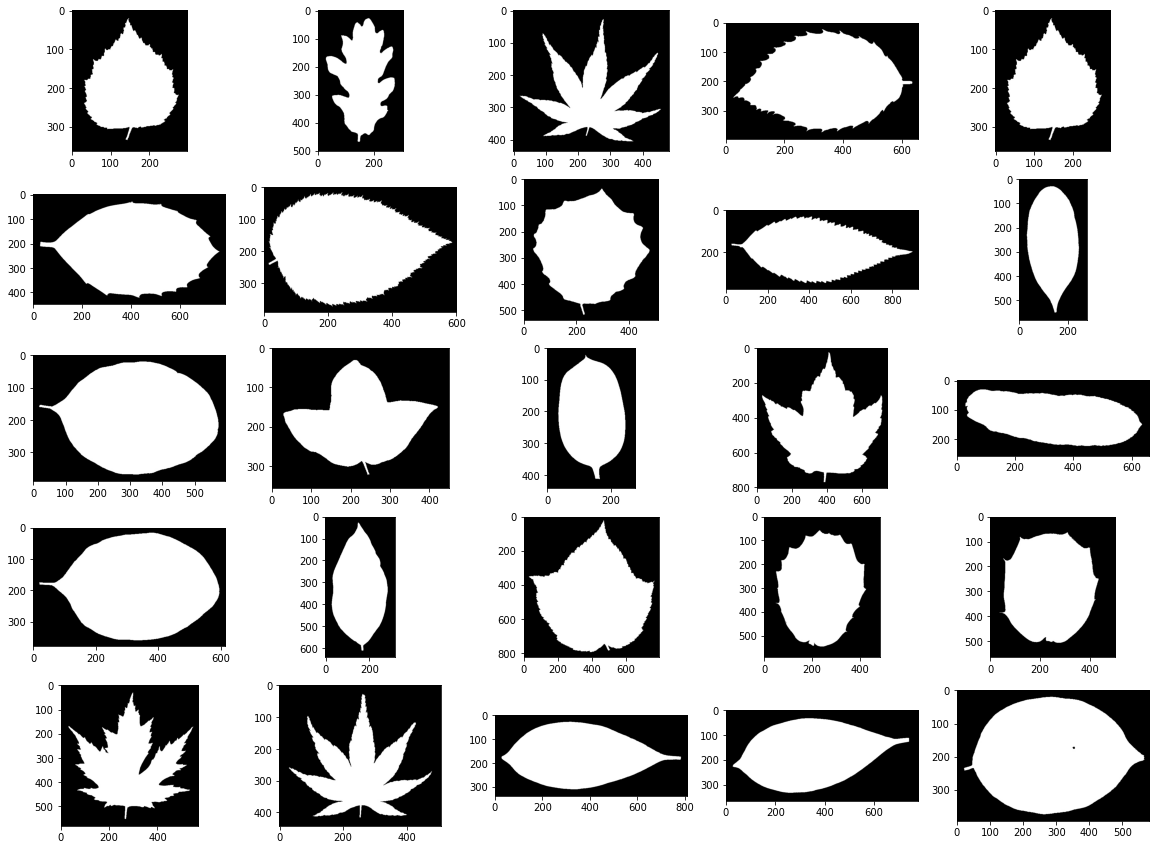

In [ ]:
plt.figure(figsize=(20,15))
import cv2 as cv
from keras.preprocessing.image import load_img
for i in range(25):
    j=np.random.choice((os.listdir('images')))
    plt.subplot(5,5,i+1)
    img=load_img(os.path.join('images',j))
    plt.imshow(img)

In [ ]:
train_df=pd.read_csv('train.csv',index_col=False)
test_df=pd.read_csv('test.csv',index_col=False)

In [ ]:
train_df.head()

,id,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,...,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,1,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,0.033203,0.013672,0.019531,0.066406,0.000000,0.029297,0.0,0.031250,0.011719,0.000000,0.025391,0.023438,0.001953,0.0,0.015625,0.000000,0.031250,0.000000,0.013672,0.029297,0.015625,0.011719,0.003906,0.025391,0.000000,0.001953,0.011719,0.009766,0.041016,...,0.008789,0.015625,0.044922,0.000000,0.037109,0.012695,0.028320,0.000000,0.019531,0.026367,0.005859,0.0,0.004883,0.016602,0.034180,0.056641,0.006836,0.000977,0.022461,0.037109,0.004883,0.021484,0.035156,0.000977,0.004883,0.015625,0.000000,0.0,0.006836,0.037109,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,2,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,0.007812,0.003906,0.027344,0.023438,0.000000,0.033203,0.0,0.009766,0.009766,0.007812,0.007812,0.019531,0.007812,0.0,0.000000,0.007812,0.027344,0.003906,0.037109,0.007812,0.048828,0.054688,0.027344,0.003906,0.000000,0.000000,0.003906,0.013672,0.033203,...,0.050781,0.001953,0.021484,0.003906,0.027344,0.023438,0.062500,0.000000,0.038086,0.000000,0.019531,0.0,0.001953,0.003906,0.015625,0.004883,0.104490,0.000000,0.061523,0.007812,0.008789,0.013672,0.011719,0.001953,0.035156,0.007812,0.000000,0.0,0.053711,0.036133,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,3,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,0.044922,0.007812,0.011719,0.021484,0.001953,0.025391,0.0,0.009766,0.011719,0.007812,0.005859,0.041016,0.001953,0.0,0.015625,0.000000,0.009766,0.001953,0.009766,0.009766,0.015625,0.005859,0.000000,0.017578,0.007812,0.005859,0.009766,0.019531,0.042969,...,0.000977,0.000000,0.000977,0.003906,0.035156,0.015625,0.027344,0.000000,0.000000,0.008789,0.015625,0.0,0.000000,0.011719,0.000977,0.000977,0.000000,0.000000,0.000000,0.005859,0.022461,0.020508,0.021484,0.056641,0.010742,0.008789,0.000000,0.0,0.000977,0.000000,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,5,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,0.017578,0.001953,0.019531,0.001953,0.003906,0.035156,0.0,0.005859,0.000000,0.001953,0.003906,0.039062,0.009766,0.0,0.009766,0.005859,0.027344,0.001953,0.017578,0.003906,0.021484,0.027344,0.027344,0.000000,0.003906,0.011719,0.003906,0.005859,0.044922,...,0.005859,0.019531,0.124020,0.000000,0.017578,0.000977,0.016602,0.009766,0.006836,0.000977,0.005859,0.0,0.000977,0.001953,0.096680,0.016602,0.126950,0.000000,0.036133,0.055664,0.000000,0.001953,0.027344,0.000000,0.006836,0.017578,0.004883,0.0,0.006836,0.022461,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,6,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,0.005859,0.001953,0.044922,0.041016,0.011719,0.041016,0.0,0.009766,0.015625,0.011719,0.007812,0.021484,0.000000,0.0,0.000000,0.015625,0.009766,0.001953,0.017578,0.041016,0.005859,0.021484,0.013672,0.017578,0.000000,0.005859,0.009766,0.027344,0.083984,...,0.000000,0.000000,0.040039,0.005859,0.005859,0.000000,0.003906,0.000000,0.000000,0.110350,0.000000,0.0,0.000000,0.087891,0.023

In [ ]:
test_df

,id,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,margin39,...,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,4,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.000000,0.005859,0.023438,0.005859,0.021484,0.076172,0.001953,0.035156,0.000000,0.001953,0.021484,0.001953,0.015625,0.009766,0.000000,0.000000,0.005859,0.007812,0.015625,0.000000,0.017578,0.029297,0.021484,0.001953,0.003906,0.025391,0.000000,0.013672,0.005859,0.042969,0.064453,0.031250,...,0.004883,0.000000,0.013672,0.001953,0.045898,0.024414,0.045898,0.000000,0.000000,0.070312,0.011719,0.000000,0.000000,0.054688,0.024414,0.026367,0.000000,0.000977,0.010742,0.020508,0.013672,0.034180,0.025391,0.000000,0.014648,0.018555,0.000000,0.000000,0.000000,0.015625,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,7,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.000000,0.033203,0.023438,0.009766,0.019531,0.039062,0.027344,0.017578,0.000000,0.017578,0.015625,0.009766,0.009766,0.042969,0.007812,0.000000,0.003906,0.005859,0.011719,0.007812,0.009766,0.037109,0.013672,0.005859,0.003906,0.019531,0.000000,0.005859,0.029297,0.019531,0.041016,0.005859,...,0.001953,0.002930,0.051758,0.001953,0.016602,0.010742,0.044922,0.000000,0.000000,0.033203,0.013672,0.000000,0.000000,0.031250,0.058594,0.041016,0.012695,0.005859,0.021484,0.047852,0.030273,0.009766,0.041992,0.000000,0.007812,0.004883,0.000000,0.000000,0.000000,0.049805,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,9,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.000000,0.011719,0.005859,0.001953,0.021484,0.001953,0.019531,0.035156,0.000000,0.007812,0.001953,0.046875,0.003906,0.003906,0.013672,0.015625,0.037109,0.027344,0.009766,0.023438,0.027344,0.005859,0.011719,0.046875,0.056641,0.001953,0.003906,0.003906,0.005859,0.001953,0.003906,0.013672,...,0.000000,0.010742,0.010742,0.000000,0.005859,0.000000,0.088867,0.000000,0.000977,0.051758,0.000000,0.000000,0.000000,0.042969,0.002930,0.026367,0.000000,0.000000,0.000000,0.013672,0.003906,0.022461,0.007812,0.038086,0.000000,0.000000,0.000000,0.000000,0.000000,0.084961,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,12,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.000000,0.003906,0.001953,0.000000,0.029297,0.000000,0.039062,0.037109,0.003906,0.007812,0.005859,0.007812,0.005859,0.025391,0.023438,0.015625,0.021484,0.033203,0.009766,0.050781,0.015625,0.005859,0.005859,0.009766,0.015625,0.001953,0.003906,0.001953,0.005859,0.001953,0.039062,0.027344,...,0.000977,0.063477,0.013672,0.000000,0.003906,0.005859,0.000977,0.022461,0.006836,0.026367,0.000000,0.040039,0.009766,0.026367,0.016602,0.017578,0.000000,0.005859,0.018555,0.011719,0.000977,0.010742,0.025391,0.000000,0.019531,0.004883,0.077148,0.036133,0.037109,0.040039,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,13,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.000000,0.005859,0.000000,0.001953,0.033203,0.000000,0.003906,0.011719,0.000000,0.003906,0.005859,0.011719,0.001953,0.035156,0.027344,0.000000,0.003906,0.056641,0.013672,0.029297,0.023438,0.000000,0.013672,0.074219,0.083984,0.009766,0.000000,0.000000,0.001953,0.007812,0.031250,0.009766,...,0.014648,0.017578,0.000977,0.002930,0.034180,0.010742

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit


encoder=LabelEncoder()
le=encoder.fit(train_df.species)
labels=le.transform(train_df.species)
classes=list(le.classes_)

In [ ]:
print(classes)

['Acer_Capillipes', 'Acer_Circinatum', 'Acer_Mono', 'Acer_Opalus', 'Acer_Palmatum', 'Acer_Pictum', 'Acer_Platanoids', 'Acer_Rubrum', 'Acer_Rufinerve', 'Acer_Saccharinum', 'Alnus_Cordata', 'Alnus_Maximowiczii', 'Alnus_Rubra', 'Alnus_Sieboldiana', 'Alnus_Viridis', 'Arundinaria_Simonii', 'Betula_Austrosinensis', 'Betula_Pendula', 'Callicarpa_Bodinieri', 'Castanea_Sativa', 'Celtis_Koraiensis', 'Cercis_Siliquastrum', 'Cornus_Chinensis', 'Cornus_Controversa', 'Cornus_Macrophylla', 'Cotinus_Coggygria', 'Crataegus_Monogyna', 'Cytisus_Battandieri', 'Eucalyptus_Glaucescens', 'Eucalyptus_Neglecta', 'Eucalyptus_Urnigera', 'Fagus_Sylvatica', 'Ginkgo_Biloba', 'Ilex_Aquifolium', 'Ilex_Cornuta', 'Liquidambar_Styraciflua', 'Liriodendron_Tulipifera', 'Lithocarpus_Cleistocarpus', 'Lithocarpus_Edulis', 'Magnolia_Heptapeta', 'Magnolia_Salicifolia', 'Morus_Nigra', 'Olea_Europaea', 'Phildelphus', 'Populus_Adenopoda', 'Populus_Grandidentata', 'Populus_Nigra', 'Prunus_Avium', 'Prunus_X_Shmittii', 'Pterocarya_S

In [ ]:
print(test_df.columns)

Index(['id', 'margin1', 'margin2', 'margin3', 'margin4', 'margin5', 'margin6',
       'margin7', 'margin8', 'margin9',
       ...
       'texture55', 'texture56', 'texture57', 'texture58', 'texture59',
       'texture60', 'texture61', 'texture62', 'texture63', 'texture64'],
      dtype='object', length=193)


In [ ]:
train_df=train_df.drop(['id','species'],axis=1)
test_id=test_df.id
test_df=test_df.drop(['id'],axis=1)


In [ ]:
test_df

,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,margin10,margin11,margin12,margin13,margin14,margin15,margin16,margin17,margin18,margin19,margin20,margin21,margin22,margin23,margin24,margin25,margin26,margin27,margin28,margin29,margin30,margin31,margin32,margin33,margin34,margin35,margin36,margin37,margin38,margin39,margin40,...,texture25,texture26,texture27,texture28,texture29,texture30,texture31,texture32,texture33,texture34,texture35,texture36,texture37,texture38,texture39,texture40,texture41,texture42,texture43,texture44,texture45,texture46,texture47,texture48,texture49,texture50,texture51,texture52,texture53,texture54,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,0.019531,0.009766,0.078125,0.011719,0.003906,0.015625,0.005859,0.000000,0.005859,0.023438,0.005859,0.021484,0.076172,0.001953,0.035156,0.000000,0.001953,0.021484,0.001953,0.015625,0.009766,0.000000,0.000000,0.005859,0.007812,0.015625,0.000000,0.017578,0.029297,0.021484,0.001953,0.003906,0.025391,0.000000,0.013672,0.005859,0.042969,0.064453,0.031250,0.005859,...,0.004883,0.000000,0.013672,0.001953,0.045898,0.024414,0.045898,0.000000,0.000000,0.070312,0.011719,0.000000,0.000000,0.054688,0.024414,0.026367,0.000000,0.000977,0.010742,0.020508,0.013672,0.034180,0.025391,0.000000,0.014648,0.018555,0.000000,0.000000,0.000000,0.015625,0.006836,0.000000,0.015625,0.000977,0.015625,0.0,0.0,0.000000,0.003906,0.053711
1,0.007812,0.005859,0.064453,0.009766,0.003906,0.013672,0.007812,0.000000,0.033203,0.023438,0.009766,0.019531,0.039062,0.027344,0.017578,0.000000,0.017578,0.015625,0.009766,0.009766,0.042969,0.007812,0.000000,0.003906,0.005859,0.011719,0.007812,0.009766,0.037109,0.013672,0.005859,0.003906,0.019531,0.000000,0.005859,0.029297,0.019531,0.041016,0.005859,0.003906,...,0.001953,0.002930,0.051758,0.001953,0.016602,0.010742,0.044922,0.000000,0.000000,0.033203,0.013672,0.000000,0.000000,0.031250,0.058594,0.041016,0.012695,0.005859,0.021484,0.047852,0.030273,0.009766,0.041992,0.000000,0.007812,0.004883,0.000000,0.000000,0.000000,0.049805,0.000000,0.000000,0.006836,0.001953,0.013672,0.0,0.0,0.000977,0.037109,0.044922
2,0.000000,0.000000,0.001953,0.021484,0.041016,0.000000,0.023438,0.000000,0.011719,0.005859,0.001953,0.021484,0.001953,0.019531,0.035156,0.000000,0.007812,0.001953,0.046875,0.003906,0.003906,0.013672,0.015625,0.037109,0.027344,0.009766,0.023438,0.027344,0.005859,0.011719,0.046875,0.056641,0.001953,0.003906,0.003906,0.005859,0.001953,0.003906,0.013672,0.007812,...,0.000000,0.010742,0.010742,0.000000,0.005859,0.000000,0.088867,0.000000,0.000977,0.051758,0.000000,0.000000,0.000000,0.042969,0.002930,0.026367,0.000000,0.000000,0.000000,0.013672,0.003906,0.022461,0.007812,0.038086,0.000000,0.000000,0.000000,0.000000,0.000000,0.084961,0.128910,0.000000,0.000977,0.000000,0.000000,0.0,0.0,0.015625,0.000000,0.000000
3,0.000000,0.000000,0.009766,0.011719,0.017578,0.000000,0.003906,0.000000,0.003906,0.001953,0.000000,0.029297,0.000000,0.039062,0.037109,0.003906,0.007812,0.005859,0.007812,0.005859,0.025391,0.023438,0.015625,0.021484,0.033203,0.009766,0.050781,0.015625,0.005859,0.005859,0.009766,0.015625,0.001953,0.003906,0.001953,0.005859,0.001953,0.039062,0.027344,0.009766,...,0.000977,0.063477,0.013672,0.000000,0.003906,0.005859,0.000977,0.022461,0.006836,0.026367,0.000000,0.040039,0.009766,0.026367,0.016602,0.017578,0.000000,0.005859,0.018555,0.011719,0.000977,0.010742,0.025391,0.000000,0.019531,0.004883,0.077148,0.036133,0.037109,0.040039,0.012695,0.015625,0.002930,0.036133,0.013672,0.0,0.0,0.089844,0.000000,0.008789
4,0.001953,0.000000,0.015625,0.009766,0.039062,0.000000,0.009766,0.000000,0.005859,0.000000,0.001953,0.033203,0.000000,0.003906,0.011719,0.000000,0.003906,0.005859,0.011719,0.001953,0.035156,0.027344,0.000000,0.003906,0.056641,0.013672,0.029297,0.023438,0.000000,0.013672,0.074219,0.083984,0.009766,0.000000,0.000000,0.001953,0.007812,0.031250,0.009766,0.023438,...,0.014648,0.017

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Columns: 192 entries, margin1 to texture64
dtypes: float64(192)
memory usage: 1.5 MB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Columns: 192 entries, margin1 to texture64
dtypes: float64(192)
memory usage: 891.1 KB


In [ ]:
print(f'Labels:',len(labels))

Labels: 990


In [ ]:
uniquelables=np.unique(labels)
print(uniquelables)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98]


In [ ]:
# Split into validation (test data) and training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(train_df,labels,test_size=0.20,shuffle=True,stratify=labels)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
model_1 = make_pipeline(StandardScaler(), RandomForestClassifier())

print(model_1.fit(X_train,y_train))

print(model_1.score(X_test,y_test))

y_pred = model_1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('randomforestclassifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=F

In [ ]:
from sklearn import svm
model_2= make_pipeline(StandardScaler(),svm.SVC(gamma=0.001, C=100.))

print(model_2.fit(X_train,y_train))

print(f'score Model:',model_2.score(X_test,y_test))

y_pred = model_2.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=100.0, break_ties=False, cache_size=200,
                     class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma=0.001,
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)
score Model: 0.9848484848484849
[[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]


In [ ]:
models = pd.DataFrame({
    'Model': ['Random Forest Classifier','Support Vector Machine'],

    'Score': [model_1.score(X_test,y_test)*100,
              model_2.score(X_test,y_test)*100,]})
models.sort_values(by='Score', ascending=True)

,Model,Score
1,Support Vector Machine,98.484848
0,Random Forest Classifier,99.494949


In [ ]:
test_pred = model_2.predict(test_df)

In [ ]:
print(test_pred)

[51 50  1 19 14  3  3 28 84  8 43 74 75 10 52 46 45 73 13 71 61 68 57 77
  1 70 28 15 35 70 53 74 47 50  4 36 14 55 36 93  8 32  8  9 71 70 38 23
 94 18 17  5 55 94 14 86 62 33 51 98 88 56 21 59 65 11 48  5 13  4 54 57
 29  7 31 98 92 84 25 10 61 43 85 24  1  2 23 83 40 22 48 90 25 21 37 56
 41 95  7 89 98 77  3 12 31 84 53 96 64 72 93 93 67 30  8 88 60 87  6 57
 34 90 60 17 75 27 51 31 39 23 68  2 41 61 24 97 29 28 68 81 42 51 86 62
 60 52 95 64 42 96 95 20 59 35 86  1 26 38 43 75 20 60 46 79 22 79 69 87
 65 97 75 21 29 21 11 10 58 94 27 22 15 45 89 54 43  5 23 94 40 49 89 72
 36 11 81 95 18 91 29 64 80  6 78 45 28  9 78 90 44 89 92 13  2 59  0 96
 70 32 29 78 91 55 44 38  5 60 49 58 94 67 92 88 90 79 25 37 18  0 76 27
 70 71 44 70 32 90 30 82 34 30 82 96 48 65 57 64 26 53 55 73  9  3 83 26
 30 63 17 22 79 63 12 78 36 14 27 25 67 38 20 54 76 69 67 97 80 44 92 69
 23 21 16 51 33 77 16 11 97  1 52 39 24 52 42 17  2 73 96 83 88  9 63 50
 16 38 87 95  3 35 83 60 59 58  0 50 62 38 93 68 55

In [ ]:
sample_df=pd.read_csv('sample_submission.csv',index_col=False)
print(sample_df)

       id  Acer_Capillipes  ...  Viburnum_x_Rhytidophylloides  Zelkova_Serrata
0       4         0.010101  ...                      0.010101         0.010101
1       7         0.010101  ...                      0.010101         0.010101
2       9         0.010101  ...                      0.010101         0.010101
3      12         0.010101  ...                      0.010101         0.010101
4      13         0.010101  ...                      0.010101         0.010101
..    ...              ...  ...                           ...              ...
589  1576         0.010101  ...                      0.010101         0.010101
590  1577         0.010101  ...                      0.010101         0.010101
591  1579         0.010101  ...                      0.010101         0.010101
592  1580         0.010101  ...                      0.010101         0.010101
593  1583         0.010101  ...                      0.010101         0.010101

[594 rows x 100 columns]


In [ ]:
output = pd.DataFrame({'Id': test_id,
                       'Labels': test_pred})
output.to_csv('submission.csv', index=False)
output.head()

,Id,Labels
0,4,51
1,7,50
2,9,1
3,12,19
4,13,14


In [ ]:
final=pd.concat([output,sample_df],axis=1)
final.head()

,Id,Labels,id,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,Acer_Saccharinum,Alnus_Cordata,Alnus_Maximowiczii,Alnus_Rubra,Alnus_Sieboldiana,Alnus_Viridis,Arundinaria_Simonii,Betula_Austrosinensis,Betula_Pendula,Callicarpa_Bodinieri,Castanea_Sativa,Celtis_Koraiensis,Cercis_Siliquastrum,Cornus_Chinensis,Cornus_Controversa,Cornus_Macrophylla,Cotinus_Coggygria,Crataegus_Monogyna,Cytisus_Battandieri,Eucalyptus_Glaucescens,Eucalyptus_Neglecta,Eucalyptus_Urnigera,Fagus_Sylvatica,Ginkgo_Biloba,Ilex_Aquifolium,Ilex_Cornuta,Liquidambar_Styraciflua,Liriodendron_Tulipifera,...,Quercus_Coccinea,Quercus_Crassifolia,Quercus_Crassipes,Quercus_Dolicholepis,Quercus_Ellipsoidalis,Quercus_Greggii,Quercus_Hartwissiana,Quercus_Ilex,Quercus_Imbricaria,Quercus_Infectoria_sub,Quercus_Kewensis,Quercus_Nigra,Quercus_Palustris,Quercus_Phellos,Quercus_Phillyraeoides,Quercus_Pontica,Quercus_Pubescens,Quercus_Pyrenaica,Quercus_Rhysophylla,Quercus_Rubra,Quercus_Semecarpifolia,Quercus_Shumardii,Quercus_Suber,Quercus_Texana,Quercus_Trojana,Quercus_Variabilis,Quercus_Vulcanica,Quercus_x_Hispanica,Quercus_x_Turneri,Rhododendron_x_Russellianum,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
0,4,51,4,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101
1,7,50,7,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101
2,9,1,9,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101
3,12,19,12,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,...,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0.010101,0